In [1]:
#Import packages 
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual,Label


### SIRD-Modell Corona
Die Simulation berechnet den Verlauf der Epidemie je nach Wert der Anfangsparameter nach den Differentialgleichungen des SIRD-Modells.
- $S_0$ Anzahl der Nichtinfizierte am Anfang der Epidemie
- $I_0$ Anzahl der Infizierte am Anfang der Epidemie. Beachte $S_0 +I_0 \leq 1$
- K Durchschnittliche Anzahl der Kontakte pro Tag
- $\tau$ Rate der Ansteckungen pro Kontakt, bei Corona $\tau\approx 0,1$ (hängt auch mit der Hygiene zusammen)
- $\delta$ Mortalität/Anteil der Infizierten, die pro Zeiteinheit sterben
-> bei Corona $\gamma\approx 0,01$ (Zahl sehr unsicher)
-  Tage $G$ Tage bis zur Genesung

In [2]:
#ODEs

def SIRD_model(y,t,beta, gamma,delta):
    S,I,R,D = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I - delta*I
    dR_dt = gamma*I
    dD_dt = delta*I
    return([dS_dt, dI_dt, dR_dt,dD_dt])

interactive(children=(FloatSlider(value=0.9, description='S0', max=1.0, step=0.05), FloatSlider(value=0.1, des…

<function __main__.my_func(S0, I0, K, tau, day, delta)>

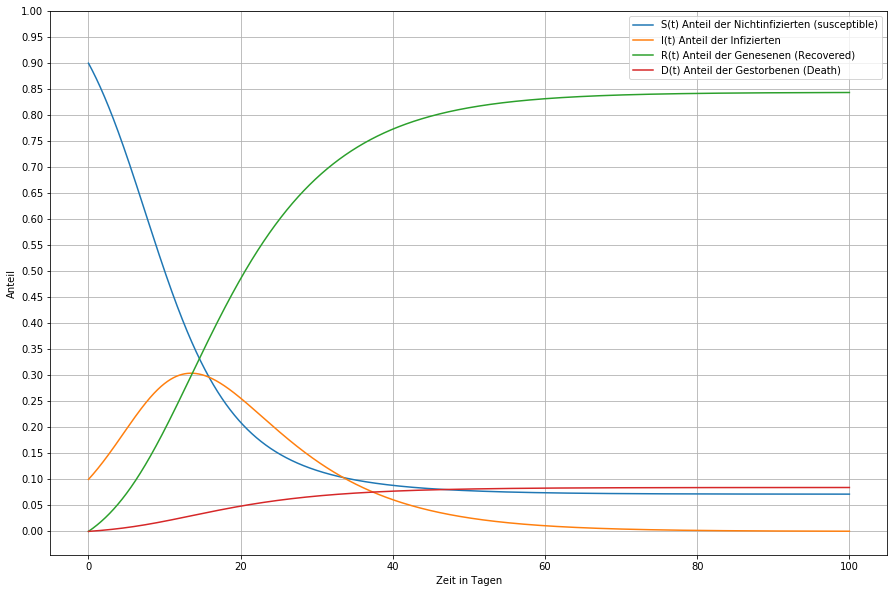

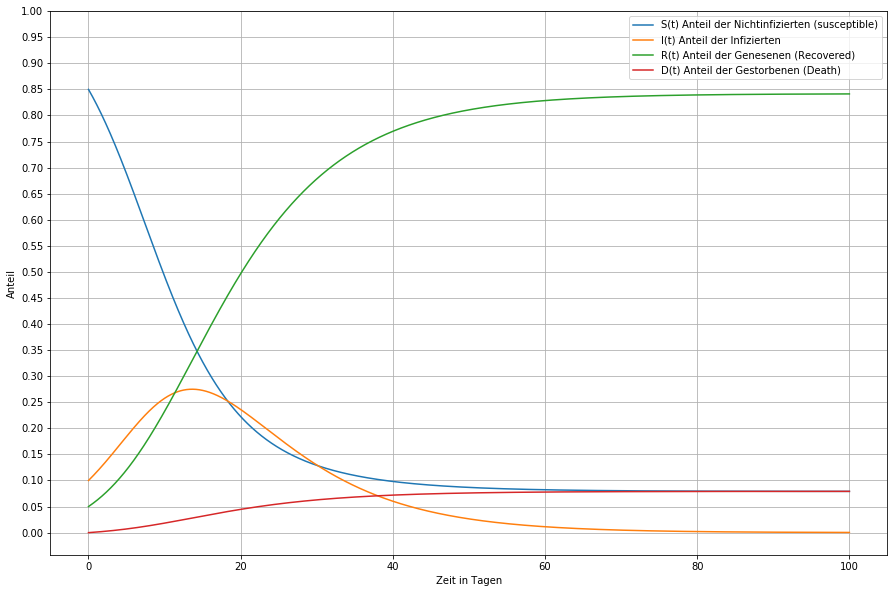

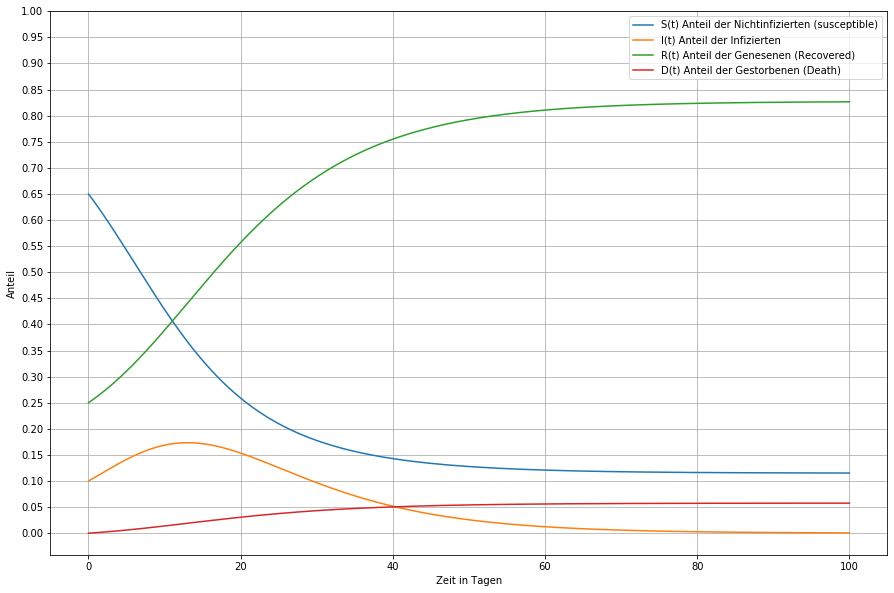

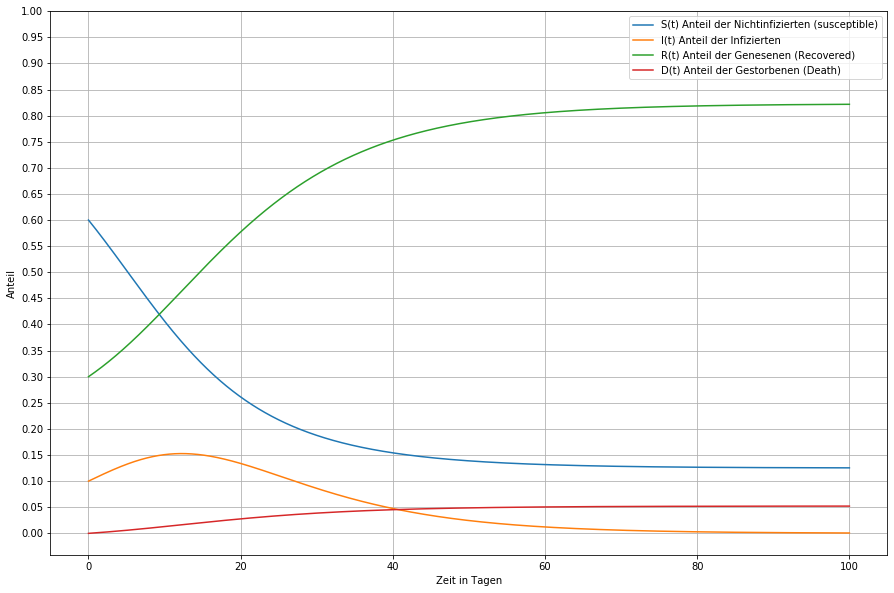

In [5]:
# Initial conditions
S0 = 0.99
I0 = 0.01
D0 = 0.0
beta = 0.35 # durschnittliche Kontaktzahl*Transmissionsrate
gamma = 1/14 # Recovery rate = 1/Infektionsdauer
delta = 0.01

def my_func(S0, I0, K,tau, day, delta):
    D0 = 0.0
    R0=1-S0-I0
    beta=K*tau
    gamma = 1/day
    # Time vector
    t=np.linspace(0,100, 10000)

    # Result
    solution = scipy.integrate.odeint(SIRD_model, [S0,I0,R0,D0], t, args=(beta, gamma, delta))
    # Plot results
    plt.figure(figsize=[15,10])
    plt.plot(t,solution[:,0], label="S(t) Anteil der Nichtinfizierten (susceptible)")
    plt.plot(t,solution[:,1], label="I(t) Anteil der Infizierten")
    plt.plot(t,solution[:,2], label="R(t) Anteil der Genesenen (Recovered)")
    plt.plot(t,solution[:,3], label="D(t) Anteil der Gestorbenen (Death)")
    plt.grid()
    plt.legend()
    plt.xlabel("Zeit in Tagen")
    plt.ylabel("Anteil")
    plt.yticks([0.0,0.05,0.1,0.15,0.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1.0])
    
    
#my_func(0.95, 0.05, 0,3, 0.1, 10, 0.01)

interact(my_func,
         I0 = widgets.FloatSlider(value = 0.1, min = 0, max = 1.0, step = 0.05, description = "I0"),
         S0 = widgets.FloatSlider(value = 0.9, min = 0, max = 1.0, step = 0.05, description = "S0"),
         K = widgets.FloatSlider(value = 3, min = 0, max = 15, step = 0.25, description = "Kontakte"),
         tau = widgets.FloatSlider(value = 0.1, min = 0, max = 1.0, step = 0.05, description = '\N{greek small letter gamma}'),
         day = widgets.FloatSlider(value = 10, min = 0, max = 20, step = 1, description = "Tage G"),
         delta = widgets.FloatSlider(value = 0.01, min = 0, max = 0.2, step = 0.01, description ='\N{greek small letter delta}'))

